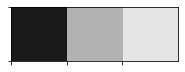

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import time
import warnings

%matplotlib inline

%load_ext autoreload
%autoreload 2

pd.options.mode.chained_assignment = None # turn off SettingWithCopyWarning
warnings.filterwarnings('ignore')  # ignore all warnings

def set_style(font='seaborn-talk'):
    plt.style.use(['seaborn-white', font])
    matplotlib.rc("font", family="Times New Roman")

    
def get_colors():
    return np.array([
        [0.1, 0.1, 0.1],          # black
#         [0.4, 0.4, 0.4],          # very dark gray
        [0.7, 0.7, 0.7],          # dark gray
        [0.9, 0.9, 0.9],          # light gray
#         'red',
#         'black',
#         'blue'
    ])
        
        
def set_size(fig, w=6, h=3):
    fig.set_size_inches(w, h)
    plt.tight_layout()

    
sns.palplot(get_colors())

set_style()
sns.set_palette(np.array(get_colors()))

In [2]:
data_set = "oc"
data_directory = os.path.join("..", "data", data_set)
plot_directory = os.path.join("figs", data_set)

if data_set == "gowalla":
    splits = [1, 5, 15, float("inf")]
else:
    splits = [1, 2, 20, float("inf")] 

In [3]:
from sklearn.metrics import roc_auc_score

def perf_measure(y_actual, y_hat):
    y_actual = list(y_actual)
    y_hat = list(y_hat)

    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)
    
    return (format(round(tpr, 3), '.3f'), format(round(fpr, 3), '.3f'))


def calc_auc(rslt, score, column='label'):
    return format(round(roc_auc_score(rslt[column], rslt[score]), 3), '.3f')


def slr_classifier_performance_for_tex(rslt):
    print("& $\Delta$ & Weights &  TP@1  & FP@1  & AUC \\\\")
    print("\\hline")
    print(
        "& $\mean{D}_{min}$ & Uniform & ", 
        "{0[0]} & {0[1]}".format(perf_measure(rslt['label'], rslt['ied_mn'] > np.log(100))), "&", 
        calc_auc(rslt,'ied_mn'), "\\\\"
    ) 
    print(
        "& $\mean{D}_{min}$ & Account  & ",
        "{0[0]} & {0[1]}".format(perf_measure(rslt['label'], rslt['ied_mn_wt_user'] > np.log(100))), "&", 
        calc_auc(rslt,'ied_mn_wt_user'), "\\\\"
    )
    print(
        "& $\mean{D}_{min}$ & Visit    & ", 
        "{0[0]} & {0[1]}".format(perf_measure(rslt['label'], rslt['ied_mn_wt_event'] > np.log(100))), "&", 
        calc_auc(rslt,'ied_mn_wt_event'), "\\\\"
    )
    print(
        "& EMD & Uniform & ", 
        "{0[0]} & {0[1]}".format(perf_measure(rslt['label'], rslt['emd'] > np.log(100))), "&", 
        calc_auc(rslt,'emd'), "\\\\"
    )
    print(
        "& EMD  & Account & ", 
        "{0[0]} & {0[1]}".format(perf_measure(rslt['label'], rslt['emd_wt_user'] > np.log(100))), "&", 
        calc_auc(rslt,'emd_wt_user'), "\\\\"
    )
    print(
        "& EMD  & Visit  & ", 
        "{0[0]} & {0[1]}".format(perf_measure(rslt['label'], rslt['emd_wt_event'] > np.log(100))), "&", 
        calc_auc(rslt,'emd_wt_event'), "\\\\"
    )

    

def cmp_classifier_performance_for_tex(rslt):
    print("& $\Delta$ & Weights & TP@0.05  & TP@0.01 & AUC    ")
    print("\\hline")
    print(
        "& $\mean{D}_{min}$ & Uniform  & ", 
        perf_measure(~rslt['label'], rslt['ied_mn'] < 0.05)[0], "  &",
        perf_measure(~rslt['label'], rslt['ied_mn'] < 0.01)[0], "  &",
        calc_auc(rslt,'ied_mn'), "\\\\"
    ) 
    print(
        "& $\mean{D}_{min}$ & Account & ",
        perf_measure(~rslt['label'], rslt['ied_mn_wt_user'] < 0.05)[0], "  &",
        perf_measure(~rslt['label'], rslt['ied_mn_wt_user'] < 0.01)[0], "  &",
        calc_auc(rslt,'ied_mn_wt_user'), "\\\\"
    )
    print(
        "& $\mean{D}_{min}$ & Visit & ", 
        perf_measure(~rslt['label'], rslt['ied_mn_wt_event'] < 0.05)[0], "  &",
        perf_measure(~rslt['label'], rslt['ied_mn_wt_event'] < 0.01)[0], "  &",
        calc_auc(rslt,'ied_mn_wt_event'), "\\\\"
    )
    print(
        "& EMD & Uniform & ", 
        perf_measure(~rslt['label'], rslt['emd'] < 0.05)[0], "  &",
        perf_measure(~rslt['label'], rslt['emd'] < 0.01)[0], "  &",
        calc_auc(rslt,'emd'), "\\\\"
    )
    print(
        "& EMD & Account & ",
        perf_measure(~rslt['label'], rslt['emd_wt_user'] < 0.05)[0], "  &",
        perf_measure(~rslt['label'], rslt['emd_wt_user'] < 0.01)[0], "  &",
        calc_auc(rslt,'emd_wt_user'), "\\\\"
    )
    print(
        "& EMD & Visit & ", 
        perf_measure(~rslt['label'], rslt['emd_wt_event'] < 0.05)[0], "  &",
        perf_measure(~rslt['label'], rslt['emd_wt_event'] < 0.01)[0], "  &",
        calc_auc(rslt,'emd_wt_event'), "\\\\"
    )

In [4]:
if data_set == "gowalla":
    mpp = pd.read_csv(os.path.join(data_directory, "mpp_octA_septB.csv"))
else:
    mpp = pd.read_csv(os.path.join(data_directory, "mpp_visits_month0a_month1b_n1.csv"))
slr = pd.read_csv(os.path.join(data_directory, "slr.csv"))
cmp = pd.read_csv(os.path.join(data_directory, "cmp.csv"))
lr = pd.read_csv(os.path.join(data_directory, "lr.csv"))

slr["same-src"] = (slr.a == slr.b).astype(bool)
cmp["same-src"] = (cmp.a == cmp.b).astype(bool)
lr["same-src"] = (lr.a == lr.b).astype(bool)

In [5]:
print("FIXED ALPHA")
print("TP/FP@1", perf_measure(lr['same-src'], lr['lr_alpha_80'] >= np.log(10)))
print("AUC", calc_auc(lr, 'lr_alpha_80', 'same-src'))
print("\n")

print("STEP ALPHA")
print("TP/FP@1", perf_measure(lr['same-src'], lr['lr_alpha_step'] >= np.log(10)))
print("AUC", calc_auc(lr, 'lr_alpha_step', 'same-src'))
print("\n")

print("FUNC ALPHA")
print("TP/FP@1", perf_measure(lr['same-src'], lr['lr_alpha_func'] >= np.log(10)))
print("AUC", calc_auc(lr, 'lr_alpha_func', 'same-src'))

FIXED ALPHA
TP/FP@1 ('0.266', '0.009')
AUC 0.787


STEP ALPHA
TP/FP@1 ('0.225', '0.009')
AUC 0.845


FUNC ALPHA
TP/FP@1 ('0.241', '0.010')
AUC 0.817


In [6]:
slr['label'] = (slr.a == slr.b).astype(bool)
print("SLR")
slr_classifier_performance_for_tex(slr)

SLR
& $\Delta$ & Weights &  TP@1  & FP@1  & AUC \\
\hline
& $\mean{D}_{min}$ & Uniform &  0.372 & 0.047 & 0.768 \\
& $\mean{D}_{min}$ & Account  &  0.426 & 0.047 & 0.774 \\
& $\mean{D}_{min}$ & Visit    &  0.399 & 0.046 & 0.768 \\
& EMD & Uniform &  0.354 & 0.036 & 0.790 \\
& EMD  & Account &  0.398 & 0.031 & 0.783 \\
& EMD  & Visit  &  0.366 & 0.031 & 0.774 \\


In [7]:
cmp['label'] = (cmp.a != cmp.b).astype(bool)
print("CMP")
cmp_classifier_performance_for_tex(cmp)

CMP
& $\Delta$ & Weights & TP@0.05  & TP@0.01 & AUC    
\hline
& $\mean{D}_{min}$ & Uniform  &  0.389   & 0.187   & 0.771 \\
& $\mean{D}_{min}$ & Account &  0.441   & 0.236   & 0.776 \\
& $\mean{D}_{min}$ & Visit &  0.415   & 0.209   & 0.771 \\
& EMD & Uniform &  0.397   & 0.154   & 0.791 \\
& EMD & Account &  0.448   & 0.208   & 0.784 \\
& EMD & Visit &  0.425   & 0.182   & 0.775 \\


# Accuracy by Bin

In [8]:
# get counts of events in A & B
cts = mpp.groupby(['uid', 'm']).count().reset_index()

cts_a = cts.loc[cts.m == 'a', ]
cts_a = cts_a.rename(columns={"location_id": "n_a"})
cts_a = cts_a[['uid', 'n_a']]

cts_b = cts.loc[cts.m == 'b', ]
cts_b = cts_b.rename(columns={"location_id": "n_b"})
cts_b = cts_b[['uid', 'n_b']]


# merge & bin counts
lr = pd.merge(lr, cts_a, left_on="a", right_on="uid").drop(columns="uid")
lr = pd.merge(lr, cts_b, left_on="b", right_on="uid").drop(columns="uid")
lr['bin_a'] = pd.cut(lr.n_a, bins=splits, right=False)
lr['bin_b'] = pd.cut(lr.n_b, bins=splits, right=False)

slr = pd.merge(slr, cts_a, left_on="a", right_on="uid").drop(columns="uid")
slr = pd.merge(slr, cts_b, left_on="b", right_on="uid").drop(columns="uid")
slr['bin_a'] = pd.cut(slr.n_a, bins=splits, right=False)
slr['bin_b'] = pd.cut(slr.n_b, bins=splits, right=False)

cmp = pd.merge(cmp, cts_a, left_on="a", right_on="uid").drop(columns="uid")
cmp = pd.merge(cmp, cts_b, left_on="b", right_on="uid").drop(columns="uid")
cmp['bin_a'] = pd.cut(cmp.n_a, bins=splits, right=False)
cmp['bin_b'] = pd.cut(cmp.n_b, bins=splits, right=False)

In [9]:
def performance_stats(x, score_func, column, criteria):
    out = []
    for s in score_func:
        d = {}
        d['score'] = s
        d['auc'] = calc_auc(x, s, column)
        d['tp'], d['fp'] = perf_measure(x[column], x[s] > criteria)
        out.append(d)
    return pd.DataFrame(out)

lr_rslt = lr.groupby(['bin_a', 'bin_b']).apply(
    lambda x: performance_stats(x, ['lr_alpha_80', 'lr_alpha_step', 'lr_alpha_func'], 'same-src', 0) 
).reset_index()
lr_rslt['method'] = 'lr'
lr_rslt.drop(columns='level_2', inplace=True)


scores = ['ied_mn', 'ied_mn_wt_event', 'ied_mn_wt_user', 'emd', 'emd_wt_event', 'emd_wt_user']
slr_rslt = slr.groupby(['bin_a', 'bin_b']).apply(
    lambda x: performance_stats(x, scores, 'same-src', 1) 
).reset_index()
slr_rslt['method'] = 'slr'
slr_rslt.drop(columns='level_2', inplace=True)


def cmp_performance_stats(x, score_func, criteria):
    out = []
    for s in score_func:
        d = {}
        d['score'] = s
        d['auc'] = calc_auc(x, s, 'label')
        d['tp'], d['fp'] = perf_measure(x['same-src'], x[s] < criteria)
        out.append(d)
    return pd.DataFrame(out)

cmp_rslt = cmp.groupby(['bin_a', 'bin_b']).apply(
    lambda x: cmp_performance_stats(x, scores, 0.05) 
).reset_index()
cmp_rslt['method'] = 'cmp'
cmp_rslt.drop(columns='level_2', inplace=True)


# combine them
rslt = pd.concat([lr_rslt, slr_rslt, cmp_rslt], ignore_index=True)
rslt = rslt.sort_values(by=['bin_a', 'bin_b', 'method', 'score'])
rslt = rslt.astype({'auc': float, 'tp': float, 'fp': float})
rslt.head()

,bin_a,bin_b,score,auc,tp,fp,method
84,"[1.0, 2.0)","[1.0, 2.0)",emd,0.692,0.399,0.129,cmp
85,"[1.0, 2.0)","[1.0, 2.0)",emd_wt_event,0.692,0.410,0.137,cmp
86,"[1.0, 2.0)","[1.0, 2.0)",emd_wt_user,0.692,0.404,0.132,cmp
81,"[1.0, 2.0)","[1.0, 2.0)",ied_mn,0.692,0.313,0.065,cmp
82,"[1.0, 2.0)","[1.0, 2.0)",ied_mn_wt_event,0.692,0.314,0.066,cmp


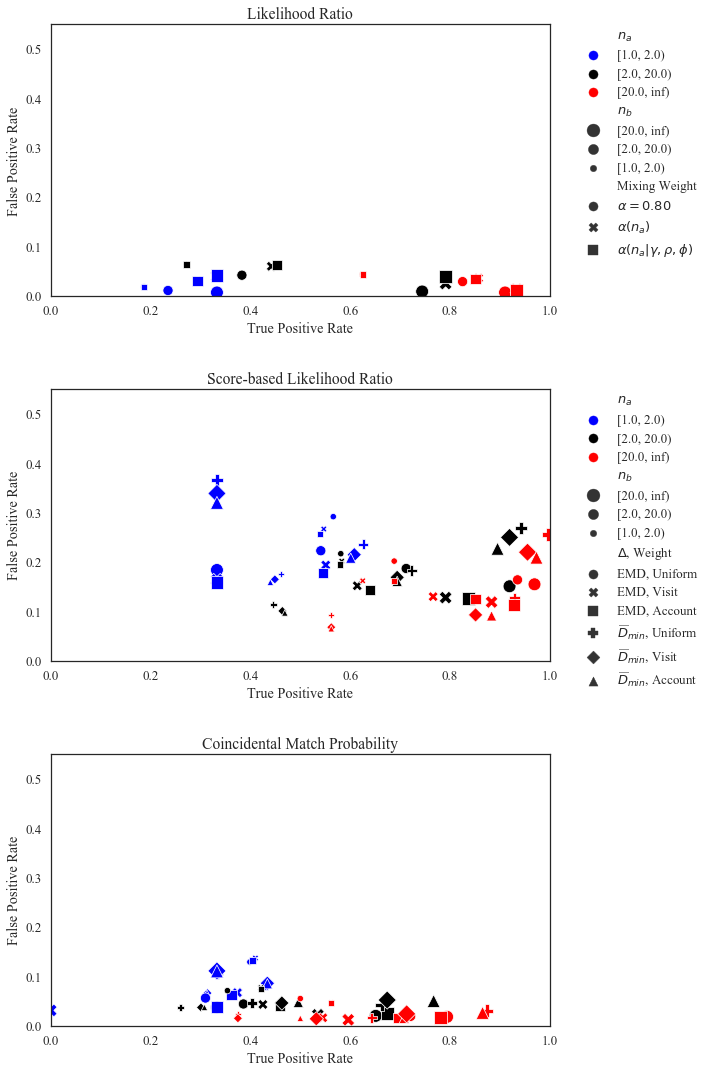

In [10]:
set_style()
sns.set_palette(
    [
        'blue',
        'black',
        'red'
    ]
)

xlim = (0,1)
ylim = (0,0.55)

f, axes = plt.subplots(3, 1, figsize=(10,15))

sns.scatterplot(
    x='tp', 
    y='fp', 
    data=rslt.loc[rslt.method == 'lr'], 
    hue='bin_a', 
    style='score', 
    size='bin_b',
    size_order=list(reversed(rslt.bin_b.cat.categories)),
    ax=axes[0]
).set_title("Likelihood Ratio")
axes[0].set_ylim(ylim)
axes[0].set_xlim(xlim)
axes[0].set_xlabel('True Positive Rate')
axes[0].set_ylabel('False Positive Rate')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(
    bbox_to_anchor=(1.05, 1), 
    loc=2, 
    borderaxespad=0.,
    handles =  handles,
    labels = [
        '$n_a$',
        '[1.0, 2.0)',
        '[2.0, 20.0)',
        '[20.0, inf)',
        '$n_b$',
        '[20.0, inf)',
        '[2.0, 20.0)',
        '[1.0, 2.0)',
        'Mixing Weight',
        r'$\alpha=0.80$',
        r'$\alpha(n_a)$',
        r'$\alpha(n_a | \gamma, \rho, \phi)$'
    ]
)


sns.scatterplot(
    x='tp', 
    y='fp',
    data=rslt.loc[rslt.method == 'slr'],
    hue='bin_a', 
    style='score', 
    size='bin_b',
    size_order=list(reversed(rslt.bin_b.cat.categories)),
    ax=axes[1]
).set_title("Score-based Likelihood Ratio")
axes[1].set_ylim(ylim)
axes[1].set_xlim(xlim)
axes[1].set_xlabel('True Positive Rate')
axes[1].set_ylabel('False Positive Rate')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(
    bbox_to_anchor=(1.05, 1), 
    loc=2, 
    borderaxespad=0.,
    handles =  handles,
    labels = [
        '$n_a$',
        '[1.0, 2.0)',
        '[2.0, 20.0)',
        '[20.0, inf)',
        '$n_b$',
        '[20.0, inf)',
        '[2.0, 20.0)',
        '[1.0, 2.0)',
        '$\Delta$, Weight',
        'EMD, Uniform',
        'EMD, Visit',
        'EMD, Account',
        r'$\widebar{D}_{min}$, Uniform',
        r'$\widebar{D}_{min}$, Visit',
        r'$\widebar{D}_{min}$, Account'
    ]
)

sns.scatterplot(
    x='tp', 
    y='fp', 
    data=rslt.loc[rslt.method == 'cmp'], 
    hue='bin_a', 
    style='score', 
    size='bin_b',
    size_order=list(reversed(rslt.bin_b.cat.categories)),
    ax=axes[2]
).set_title("Coincidental Match Probability")
axes[2].set_ylim(ylim)
axes[2].set_xlim(xlim)
axes[2].set_xlabel('True Positive Rate')
axes[2].set_ylabel('False Positive Rate')
axes[2].get_legend().remove()

plt.tight_layout()
plt.savefig(os.path.join(plot_directory, 'tp_v_fp_by_approach_and_nevents.eps'), dpi=500)

plt.show()

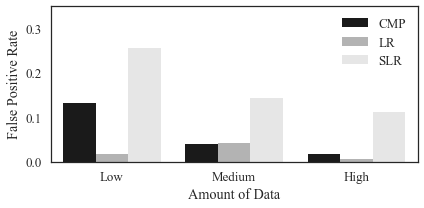

In [11]:
sc = ['emd_wt_user', 'lr_alpha_80']
simple = rslt.loc[(rslt.bin_a == rslt.bin_b) & 
                  (rslt.score.isin(sc))]
simple['x'] = simple.bin_a.cat.codes

set_style()
sns.set_palette(get_colors())

f, ax = plt.subplots()

sns.barplot(
    x='x', 
    y='fp',
    data=simple,
    hue='method',
)
ax.set_xticklabels(['Low', 'Medium', 'High'])
ax.set_ylim((0,0.35))

legend = plt.legend()
legend.get_texts()[0].set_text('CMP')
legend.get_texts()[1].set_text('LR')
legend.get_texts()[2].set_text('SLR')

plt.xticks([0,1,2])
plt.xlabel('Amount of Data')
plt.ylabel('False Positive Rate')

set_size(f)
plt.savefig(os.path.join(plot_directory, "fp_vs_data.eps"), dpi=500)

plt.show()

# ECE Plots

In [12]:
sns.set_palette(['red', 'black', 'blue'])

from sklearn.isotonic import IsotonicRegression


def log2(x):
    return np.log(x) / np.log(2)


# def log_lr_cost(lr, score_col):    
#     lr_same = np.exp(np.array(lr[score_col].loc[lr.a == lr.b], 
#                               dtype=np.float128))
#     lr_diff = np.exp(np.array(lr[score_col].loc[lr.a != lr.b], 
#                               dtype=np.float128))
#     return (2*len(lr_same))**-1 * np.sum(log2(1 + 1/(lr_same))) + \
#            (2*len(lr_diff))**-1 * np.sum(log2(1 + lr_diff))
# 
# print(round(log_lr_cost(oc_lr, 'lr_alpha_vary'),3))


def log_lr_cost(lr_same, lr_diff, neutral=False): 
    if neutral:
        lr_same = np.ones(len(lr_same))
        lr_diff = np.ones(len(lr_diff))
        
    return 0.5 * np.mean(log2(1 + 1/(lr_same))) + \
           0.5 * np.mean(log2(1 + lr_diff))


def calibrate(data, score_col):
    pava = IsotonicRegression().fit(
        X=np.array(data[score_col], dtype='float128'), 
        y=np.array(data['same-src'])
    )
    post_prob = pava.predict(data[score_col])

    n_s = sum(data['same-src'])
    n_d = len(data) - n_s
    post_log_odds = np.log(post_prob) - np.log(1-post_prob)
    prior_log_odds = np.log(n_s/n_d)
    
    return post_log_odds - prior_log_odds


def ece(lr_same, lr_diff, odds, neutral=False):
    if neutral:
        lr_same = np.ones(len(lr_same))
        lr_diff = np.ones(len(lr_diff))
#     s = ((odds/(1+odds))) * np.sum(log2(1 + 1/(lr_same*odds)))
#     d = ( (1/(1+odds))  ) * np.sum(log2(1 + lr_diff*odds))
#     return (s+d) / (len(lr_same) + len(lr_diff))
    return ((odds/(1+odds))) * np.mean(log2(1 + 1/(lr_same*odds))) + \
           ( (1/(1+odds))  ) * np.mean(log2(1 + lr_diff*odds))


def plot_ece(lr, score_col, rng=[-3,3], log_scale=True):
    ind_same = lr.a == lr.b
    ind_diff = lr.a != lr.b
    lr_same = np.array(lr[score_col].loc[ind_same], dtype=np.float128)
    lr_diff = np.array(lr[score_col].loc[ind_diff], dtype=np.float128)
    if log_scale:
        lr_same = np.exp(lr_same)
        lr_diff = np.exp(lr_diff)

    log_odds = np.arange(rng[0], rng[1], 0.01)
    odds = np.power(10, log_odds)
    
    # Neutral ECE -> LR = 1
    ece_neutral = [ece(lr_same, lr_diff, x, neutral=True) for x in odds]
    cllr_neutral = log_lr_cost(lr_same, lr_diff, neutral=True)

    # Empirical ECE
    ece_emp = [ece(lr_same, lr_diff, x) for x in odds]
    cllr_emp = log_lr_cost(lr_same, lr_diff)
    
    # PAV calibrated ECE
    lr_calibrated = calibrate(lr, score_col)
    lr_same = np.exp(np.array(lr_calibrated[ind_same], dtype=np.float128))
    lr_diff = np.exp(np.array(lr_calibrated[ind_diff], dtype=np.float128))
        
    ece_calibrated = [ece(lr_same, lr_diff, x) for x in odds]
    cllr_calibrated = log_lr_cost(lr_same, lr_diff)
    
    # make amenable for seaborn plotting
    lr_key = 'LR values, {}'.format(round(cllr_emp, 3))
    neutral_key = 'LR=1 always, {}'.format(round(cllr_neutral, 3))
    pav_key = 'PAV Calibrated, {}'.format(round(cllr_calibrated, 3))
    dat = pd.DataFrame({'log_odds': log_odds, 
                        lr_key: ece_emp, 
                        neutral_key: ece_neutral,
                        pav_key: ece_calibrated})
    dat = dat.melt('log_odds')
        
    f, ax = plt.subplots()

    ax = sns.lineplot(
        x='log_odds',
        y='value',
        style='variable',
        data=dat,
        hue='variable',
        lw=2
    )
    plt.axvline(0, color='Grey', linestyle='dotted')
    
    ax.set(ylabel="Empirical cross-entropy")
    ax.set(xlabel="$log_{10}$ $O(H_s|I)$")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])
    
    return f, ax

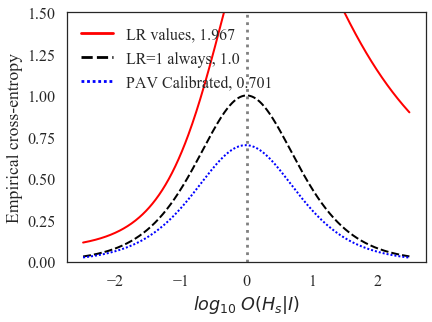

In [13]:
set_style(font='seaborn-poster')

if data_set == "gowalla":
    ylim = (0, 1.2)
else:
    ylim = (0, 1.5)

f, ax = plot_ece(lr, 'lr_alpha_80', rng=[-2.5,2.5])
set_size(f, w=6, h=4.5)
plt.ylim(ylim)

plt.savefig(os.path.join(plot_directory, "ece_lr_80.eps"), dpi=500)

plt.show()

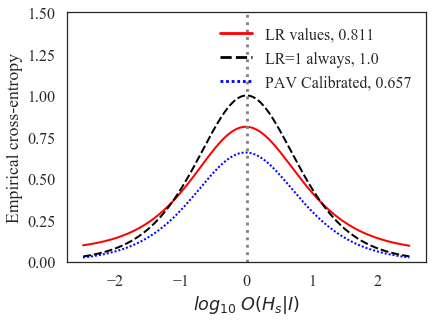

In [14]:
f, ax = plot_ece(lr, 'lr_alpha_step', rng=[-2.5,2.5])
set_size(f, w=6, h=4.5)
plt.ylim(ylim)

plt.savefig(os.path.join(plot_directory, "ece_lr_step.eps"), dpi=500)

plt.show()

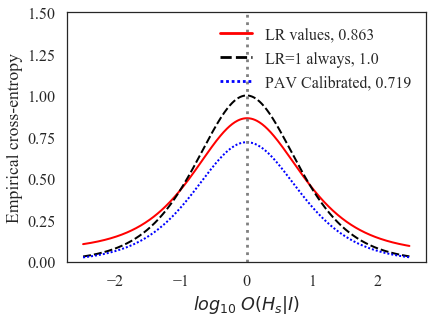

In [15]:
f, ax = plot_ece(lr, 'lr_alpha_func', rng=[-2.5,2.5])
set_size(f, w=6, h=4.5)
plt.ylim(ylim)

plt.savefig(os.path.join(plot_directory, "ece_lr_func.eps"), dpi=500)

plt.show()

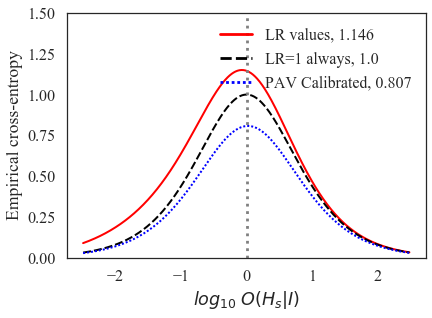

In [16]:
f, ax = plot_ece(slr, 'ied_mn', rng=[-2.5,2.5])
set_size(f, w=6, h=4.5)
plt.ylim(ylim)

plt.savefig(os.path.join(plot_directory, "ece_ied_mn.eps"), dpi=500)

plt.show()

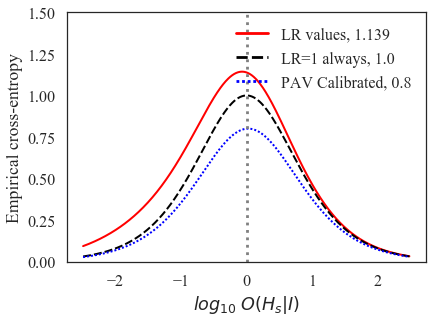

In [17]:
f, ax = plot_ece(slr, 'ied_mn_wt_event', rng=[-2.5,2.5])
set_size(f, w=6, h=4.5)
plt.ylim(ylim)

plt.savefig(os.path.join(plot_directory, "ece_ied_mn_wt_event.eps"), dpi=500)

plt.show()

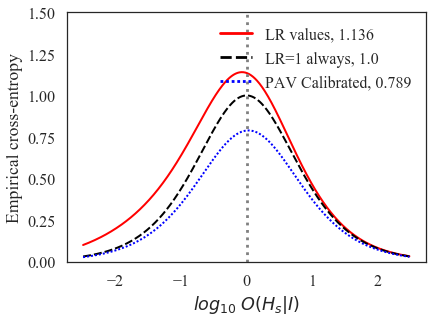

In [18]:
f, ax = plot_ece(slr, 'ied_mn_wt_user', rng=[-2.5,2.5])
set_size(f, w=6, h=4.5)
plt.ylim(ylim)

plt.savefig(os.path.join(plot_directory, "ece_ied_mn_wt_user.eps"), dpi=500)

plt.show()

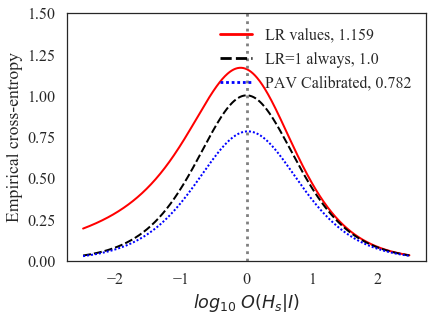

In [19]:
f, ax = plot_ece(slr, 'emd', rng=[-2.5,2.5])
set_size(f, w=6, h=4.5)
plt.ylim(ylim)

plt.savefig(os.path.join(plot_directory, "ece_emd.eps"), dpi=500)

plt.show()

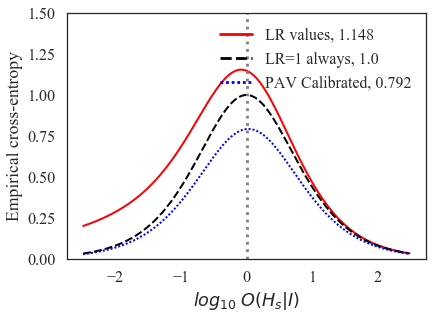

In [20]:
f, ax = plot_ece(slr, 'emd_wt_event', rng=[-2.5,2.5])
set_size(f, w=6, h=4.5)
plt.ylim(ylim)

plt.savefig(os.path.join(plot_directory, "ece_emd_wt_event.eps"), dpi=500)

plt.show()

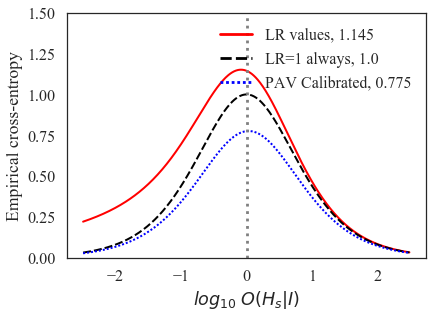

In [21]:
f, ax = plot_ece(slr, 'emd_wt_user', rng=[-2.5,2.5])
set_size(f, w=6, h=4.5)
plt.ylim(ylim)

plt.savefig(os.path.join(plot_directory, "ece_emd_wt_user.eps"), dpi=500)

plt.show()

# Score Distns

In [22]:
if data_set == "gowalla":
    scores = pd.read_csv(os.path.join(data_directory, "score_func_vals.csv"))
else:
    scores = pd.read_csv(os.path.join("..", "data", "DFRWS_USA", data_set, "score_func_vals.csv"))

index_same = scores.a == scores.b
index_diff = scores.a != scores.b

scores.head()

,a,b,ied_med,ied_mn,ied_mn_wt_event,ied_mn_wt_user,emd,emd_wt_event,emd_wt_user
0,1,1,22.291881,22.291881,22.291881,22.291881,24.900571,23.734986,23.335357
1,1009,1009,8.082238,8.443559,12.186550,11.995258,9.215650,12.212204,12.011383
2,207,207,0.457699,1.825209,1.445924,1.206043,5.284902,12.375877,9.655803
3,2231,2231,6.569074,7.122262,5.754189,5.006451,7.122262,5.754189,5.006451
4,3604,3604,0.030067,0.508251,1.564566,0.666724,2.797701,7.570990,3.573957


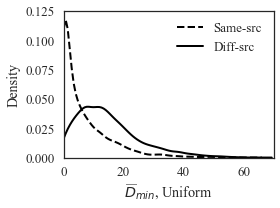

In [23]:
if data_set == "gowalla":
    ied_ylim = (0,0.055)
    ied_clip = (0,300)
    emd_ylim = (0,0.035)
    emd_clip = (0,300)
elif data_set == "oc":
    ied_ylim = (0,0.125)
    ied_clip = (0, 70)
    emd_ylim = (0,0.09)
    emd_clip = (0,65)
else:
    ied_ylim = (0,0.35)
    ied_clip = (0,25)
    emd_ylim = (0,0.25)
    emd_clip = (0,25)

    
set_style(font='seaborn-talk')

f, ax = plt.subplots()

ax = sns.kdeplot(
    scores.loc[index_same].ied_mn, 
    color = 'black',
    linestyle = 'dashed',
    lw=2,
    clip=ied_clip,
    label='Same-src'
)
ax = sns.kdeplot(
    scores.loc[index_diff].ied_mn, 
    color = 'black',
    lw=2,
    clip=ied_clip,
    label='Diff-src'
)
ax.set(ylabel="Density")
ax.set(xlabel=r"$\widebar{D}_{min}$, Uniform")

ax.set_ylim(ied_ylim)
ax.set_xlim(ied_clip)

set_size(f, 4, 3)
plt.savefig(os.path.join(plot_directory, "density_ied_mn.eps"), dpi=500)

plt.show()

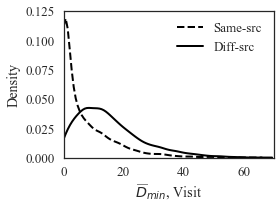

In [24]:
set_style()

f, ax = plt.subplots()

ax = sns.kdeplot(
    scores.loc[index_same].ied_mn_wt_event, 
    color = 'black',
    linestyle = 'dashed',
    lw=2,
    clip=ied_clip,
    label='Same-src'
)
ax = sns.kdeplot(
    scores.loc[index_diff].ied_mn_wt_event, 
    color = 'black',
    lw=2,
    clip=ied_clip,
    label='Diff-src'
)
ax.set(ylabel="Density")
ax.set(xlabel=r"$\widebar{D}_{min}$, Visit")

ax.set_ylim(ied_ylim)
ax.set_xlim(ied_clip)

set_size(f, 4, 3)
plt.savefig(os.path.join(plot_directory, "density_ied_mn_wt_event.eps"), dpi=500)

plt.show()

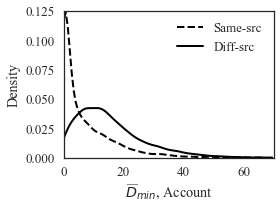

In [25]:
set_style()

f, ax = plt.subplots()

ax = sns.kdeplot(
    scores.loc[index_same].ied_mn_wt_user, 
    color = 'black',
    linestyle = 'dashed',
    lw=2,
    clip=ied_clip,
    label='Same-src'
)
ax = sns.kdeplot(
    scores.loc[index_diff].ied_mn_wt_user, 
    color = 'black',
    lw=2,
    clip=ied_clip,
    label='Diff-src'
)
ax.set(ylabel="Density")
ax.set(xlabel=r"$\widebar{D}_{min}$, Account")

ax.set_ylim(ied_ylim)
ax.set_xlim(ied_clip)

set_size(f, 4, 3)
plt.savefig(os.path.join(plot_directory, "density_ied_mn_wt_user.eps"), dpi=500)

plt.show()

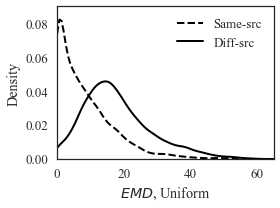

In [26]:
set_style()

f, ax = plt.subplots()

ax = sns.kdeplot(
    scores.loc[index_same].emd, 
    color = 'black',
    linestyle = 'dashed',
    lw=2,
    clip=emd_clip,
    label='Same-src'
)
ax = sns.kdeplot(
    scores.loc[index_diff].emd, 
    color = 'black',
    lw=2,
    clip=emd_clip,
    label='Diff-src'
)
ax.set(ylabel="Density")
ax.set(xlabel="$EMD$, Uniform")

ax.set_ylim(emd_ylim)
ax.set_xlim(emd_clip)

set_size(f, 4, 3)
plt.savefig(os.path.join(plot_directory, "density_emd.eps"), dpi=500)

plt.show()

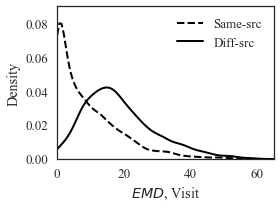

In [27]:
set_style()

f, ax = plt.subplots()

ax = sns.kdeplot(
    scores.loc[index_same].emd_wt_event, 
    color = 'black',
    linestyle = 'dashed',
    lw=2,
    clip=emd_clip,
    label='Same-src'
)
ax = sns.kdeplot(
    scores.loc[index_diff].emd_wt_event, 
    color = 'black',
    lw=2,
    clip=emd_clip,
    label='Diff-src'
)
ax.set(ylabel="Density")
ax.set(xlabel="$EMD$, Visit")

ax.set_ylim(emd_ylim)
ax.set_xlim(emd_clip)

set_size(f, 4, 3)
plt.savefig(os.path.join(plot_directory, "density_emd_wt_event.eps"), dpi=500)

plt.show()

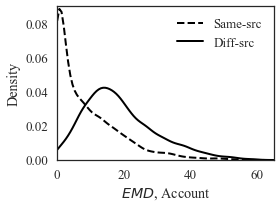

In [28]:
set_style()

f, ax = plt.subplots()

ax = sns.kdeplot(
    scores.loc[index_same].emd_wt_user, 
    color = 'black',
    linestyle = 'dashed',
    lw=2,
    clip=emd_clip,
    label='Same-src'
)
ax = sns.kdeplot(
    scores.loc[index_diff].emd_wt_user, 
    color = 'black',
    lw=2,
    clip=emd_clip,
    label='Diff-src'
)
ax.set(ylabel="Density")
ax.set(xlabel="$EMD$, Account")

ax.set_ylim(emd_ylim)
ax.set_xlim(emd_clip)

set_size(f, 4, 3)
plt.savefig(os.path.join(plot_directory, "density_emd_wt_user.eps"), dpi=500)

plt.show()

# ECE by strata

In [29]:
lr['n_a_cat'] = lr.bin_a.cat.codes
lr['n_b_cat'] = lr.bin_b.cat.codes
tmp_lr = lr.loc[lr.n_a_cat == lr.n_b_cat]

tmp_lr.loc[tmp_lr.n_a > 20]

,a,b,lr_alpha_80,alpha_step,lr_alpha_step,alpha_func,lr_alpha_func,same-src,n_a,n_b,bin_a,bin_b,n_a_cat,n_b_cat
8,207.0,207.0,15.493292,0.55,19.798583,0.534635,19.901212,True,40,21,"[20.0, inf)","[20.0, inf)",2,2
12,5499.0,207.0,-28.412936,0.55,-14.440029,0.549286,-14.411945,False,43,21,"[20.0, inf)","[20.0, inf)",2,2
25,207.0,366.0,-37.758275,0.55,-18.863624,0.534635,-18.074757,False,40,24,"[20.0, inf)","[20.0, inf)",2,2
59,1500.0,4258.0,-61.828590,0.55,-30.823857,0.514274,-27.884992,False,36,39,"[20.0, inf)","[20.0, inf)",2,2
61,4258.0,4258.0,390.846862,0.55,376.256654,0.524576,374.414399,True,38,39,"[20.0, inf)","[20.0, inf)",2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,3141.0,4521.0,-42.908653,0.70,-32.174307,0.723876,-34.375364,False,91,27,"[20.0, inf)","[20.0, inf)",2,2
11497,5271.0,4521.0,-42.945381,0.55,-21.399576,0.470309,-17.040694,False,28,27,"[20.0, inf)","[20.0, inf)",2,2
11499,6383.0,4521.0,-43.454824,0.55,-21.559708,0.568047,-22.664834,False,47,27,"[20.0, inf)","[20.0, inf)",2,2
11500,6600.0,4521.0,-43.454824,0.85,-51.222240,0.871347,-55.367184,False,251,27,"[20.0, inf)","[20.0, inf)",2,2


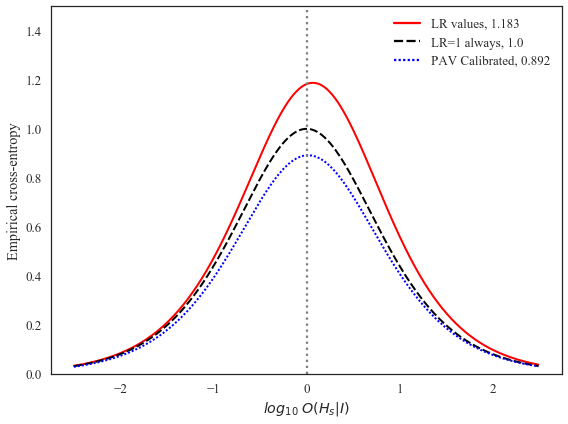

In [30]:
f, ax = plot_ece(tmp_lr.loc[tmp_lr.n_a_cat == 0], 'lr_alpha_80', rng=[-2.5,2.5])
set_size(f, w=8, h=6)
plt.ylim(ylim)

# plt.savefig(os.path.join(plot_directory, "ece_lr_step_data_low.eps"), dpi=500)

plt.show()

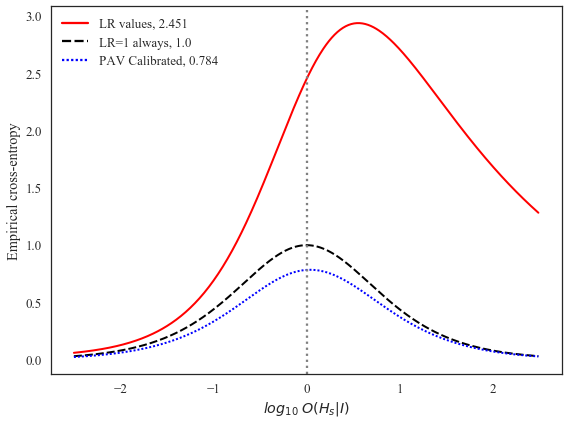

In [31]:
f, ax = plot_ece(tmp_lr.loc[tmp_lr.n_a_cat == 1], 'lr_alpha_80', rng=[-2.5,2.5])
set_size(f, w=8, h=6)
# plt.ylim(ylim)

# plt.savefig(os.path.join(plot_directory, "ece_lr_80_data_low.eps"), dpi=500)

plt.show()

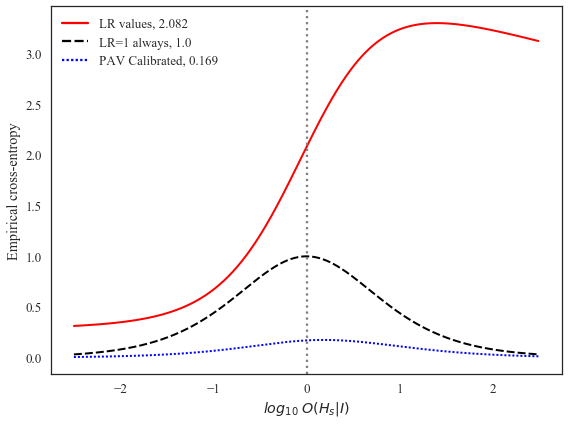

In [32]:
f, ax = plot_ece(tmp_lr.loc[tmp_lr.n_a_cat == 2], 'lr_alpha_80', rng=[-2.5,2.5])
set_size(f, w=8, h=6)
# plt.ylim(ylim)

# plt.savefig(os.path.join(plot_directory, "ece_lr_80_data_low.eps"), dpi=500)

plt.show()

In [33]:
test = tmp_lr.loc[tmp_lr.n_a_cat == 2].sort_values('lr_alpha_step')
wrong_ind = (
#     ((test['lr_alpha_step'] > 0) & (test['same-src'] == False))
    ((test['lr_alpha_step'] < 0) & (test['same-src'] == True))
)
test.loc[wrong_ind]

,a,b,lr_alpha_80,alpha_step,lr_alpha_step,alpha_func,lr_alpha_func,same-src,n_a,n_b,bin_a,bin_b,n_a_cat,n_b_cat
3682,3145.0,3145.0,-51.762365,0.70,-32.721792,0.723876,-36.695609,True,91,67,"[20.0, inf)","[20.0, inf)",2,2
1027,3140.0,3140.0,-51.449053,0.70,-32.527173,0.723876,-36.479256,True,91,67,"[20.0, inf)","[20.0, inf)",2,2
5216,3142.0,3142.0,-51.449053,0.70,-32.527173,0.723876,-36.479255,True,91,67,"[20.0, inf)","[20.0, inf)",2,2
5487,3141.0,3141.0,-51.449053,0.70,-32.527173,0.723876,-36.479255,True,91,67,"[20.0, inf)","[20.0, inf)",2,2
8478,4655.0,4655.0,-51.390180,0.70,-32.512296,0.721256,-36.008543,True,90,67,"[20.0, inf)","[20.0, inf)",2,2
627,1494.0,1494.0,-50.271473,0.70,-31.597089,0.723876,-35.495403,True,91,66,"[20.0, inf)","[20.0, inf)",2,2
5975,6433.0,6433.0,-48.837970,0.55,-24.697994,0.440034,-18.002402,True,23,32,"[20.0, inf)","[20.0, inf)",2,2
4695,642.0,642.0,-28.104405,0.70,-21.459947,0.603066,-16.635362,True,55,23,"[20.0, inf)","[20.0, inf)",2,2
4556,1926.0,1926.0,-43.750942,0.55,-17.035381,0.514274,-14.495280,True,36,37,"[20.0, inf)","[20.0, inf)",2,2
7537,5543.0,5543.0,-33.452352,0.55,-16.654080,0.440034,-12.102752,True,23,21,"[20.0, inf)","[20.0, inf)",2,2


In [34]:
slr.loc[(slr.a == 4518) & (slr.b == 2133)]

,a,b,ied_med,ied_mn,ied_mn_wt_event,ied_mn_wt_user,emd,emd_wt_event,emd_wt_user,same-src,label,n_a,n_b,bin_a,bin_b
4631,4518.0,2133.0,6.791151,6.733402,6.839751,7.040867,11.181658,10.812409,11.519678,False,False,39,81,"[20.0, inf)","[20.0, inf)"


In [35]:
cmp.loc[(cmp.a == 4518) & (cmp.b == 2133)]

,a,b,ied_med,ied_mn,ied_mn_wt_event,ied_mn_wt_user,emd,emd_wt_event,emd_wt_user,same-src,label,n_a,n_b,bin_a,bin_b
4631,4518.0,2133.0,0.006687,0.005684,0.009027,0.008916,0.002563,0.015268,0.015157,False,True,39,81,"[20.0, inf)","[20.0, inf)"


In [36]:
mpp.loc[mpp.uid.isin([3145, 3140, 3142, 3141, 4655, 1494])].old_uid.unique()

array([3.47367500e+07, 1.82738206e+08, 1.82738669e+08, 1.82739066e+08,
       1.83323180e+08, 5.56126496e+08])

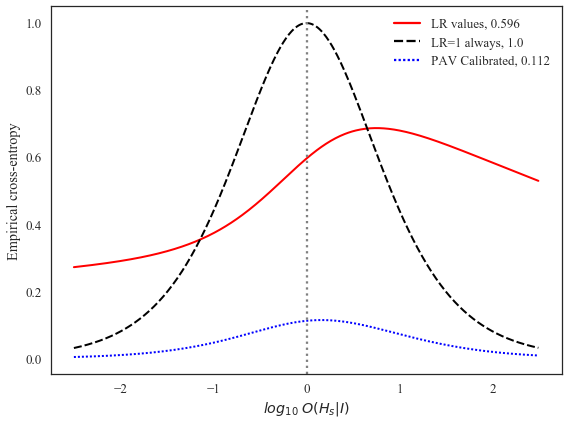

In [37]:
# f, ax = plot_ece(tmp_lr.loc[(tmp_lr.n_a_cat == 2) & ~(wrong_ind)], 'lr_alpha_step', rng=[-2.5,2.5])

f, ax = plot_ece(tmp_lr.loc[(tmp_lr.n_a_cat == 2) & ~(tmp_lr.index.isin([3682,1027,5216,5487,8478,627]))], 
                 'lr_alpha_step',
                 rng=[-2.5,2.5])

set_size(f, w=8, h=6)
# plt.ylim(ylim)

# plt.savefig(os.path.join(plot_directory, "ece_lr_80_data_low.eps"), dpi=500)

plt.show()

In [44]:
import branca.colormap as cm
from branca.element import Template, MacroElement
from collections import defaultdict
import folium
from folium.plugins import HeatMap, MarkerCluster
from IPython import display
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from selenium import webdriver


def calc_freqs(df):
    ### grid the population data for OC & count visits in each bin
    data = df.copy()
    data["lat_r"] = data.lat.round(3)
    data["lon_r"] = data.lon.round(3)
    freqs = (
        data.groupby(["lat_r", "lon_r"]).count().reset_index()[["lat_r", "lon_r", "event_id"]]
    )
    freqs.columns = ["lat_r", "lon_r", "freq"]
    return freqs


def get_user(mpp, uid, mark):
    out = mpp.copy()
    # out = out.drop_duplicates(subset=["location_id", "m"])
    return out.loc[(out.uid == uid) & (out.m == mark)].reset_index(drop=True)


def make_user_scatter_plot(mpp, uid, mark):
    user = get_user(mpp, uid, mark)
    return list(zip(user.lat, user.lon))


def plot_heat_and_scatter(freqs, mpp, uid, loc, uidB=None, heat=True):
    if uidB is None:
        uidB = uid
    if heat:
        col = 'lightgreen'
        opacity = 0.8
    else:
        col = 'red'
        opacity = 0.75
    
    ### make the map
    if loc == 'oc':
        hmap = folium.Map(
            location=[33.68, -117.78],
            width='85%', 
            zoom_start=9.5, 
            zoom_control=False,
            tiles='CartoDB positron',
        )
    elif loc == 'oc_vignette':
        hmap = folium.Map(
            location=[33.568, -117.713],
            width='90%',
            zoom_start=15, 
            zoom_control=False,
            tiles='CartoDB positron',
        )
    elif loc =='ny':
        hmap = folium.Map(
            location=[40.75, -74],
            width='90%', 
            zoom_start=13.4,
            zoom_control=False,
            tiles='CartoDB positron',
        )
    
    ### make the heatmap
    if heat:
        steps = 20
        color_map = cm.linear.YlOrRd_09.scale(0, 1).to_step(steps)

        gradient_map = defaultdict(dict)
        for i in range(steps):
            gradient_map[1/steps*i] = color_map.rgb_hex_str(1/steps*i)

        if loc in {'oc', 'oc_vignette'}:
            heat = HeatMap( 
                data=list(zip(freqs['lat_r'], freqs['lon_r'], freqs['freq'])),
                min_opacity=0.2,
                max_val=float(freqs['freq'].max()),
                radius=25, 
                blur=16, 
                max_zoom=5, 
                gradient=gradient_map
            )
        
        if loc == 'ny':
            heat = HeatMap( 
                data=list(zip(freqs['lat_r'], freqs['lon_r'], freqs['freq'])),
                min_opacity=0.2,
                max_val=float(freqs['freq'].max()),
                radius=20, 
                blur=12, 
                max_zoom=5, 
                gradient=gradient_map
            )
        
        hmap.add_child(heat)
        hmap.add_child(color_map)

    ### make the scatters
    f = folium.map.FeatureGroup()
    for pt in make_user_scatter_plot(mpp, uid, 'a'):
        f.add_child(
            folium.vector_layers.CircleMarker(
                pt,
                radius=6,
                color=None,
                fill_color='black',
                fill_opacity=0.75)
        )

    for pt in make_user_scatter_plot(mpp, uidB, 'b'):
        f.add_child(
            folium.vector_layers.CircleMarker(
                pt,
                radius=4,
                color=None,
                fill_color=col,
                fill_opacity=opacity)
        )
    hmap.add_child(f)

    ### add legend
    macro = MacroElement()
    macro._template = Template(template)
    hmap.get_root().add_child(macro)

    return hmap


### https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:24px; left: 20px; bottom: 40px;'>
     
<div class='legend-title'></div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:black;'></span>A</li>
    <li><span style='background:red;'></span>B</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 10px;
    width: 10px;
    -webkit-border-radius: 5px;
    -moz-border-radius: 5px;
    border-radius: 5px;
    margin-right: 5px;
    margin-left: 0;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""


for index, row in test.loc[wrong_ind].iterrows():
    m = plot_heat_and_scatter(
        mpp=mpp, 
        uid=row.a,
        uidB=row.b,
        freqs=None,
        loc="oc",
        heat=False
    )
    display.clear_output(wait=True)
    display.display(m)
    time.sleep(2)

KeyboardInterrupt: 

# ECE curve for each user

In [39]:
# ((odds/(1+odds))) * np.mean(log2(1 + 1/(lr_same*odds)))
# ( (1/(1+odds))  ) * np.mean(log2(1 + lr_diff*odds))


def plot_indiv_ece(lr, score_col, rng=[-3,3], log_scale=True, same_src=True):
    ind_same = lr.a == lr.b
    ind_diff = lr.a != lr.b
    lr_same = np.array(lr[score_col].loc[ind_same], dtype=np.float128)
    lr_diff = np.array(lr[score_col].loc[ind_diff], dtype=np.float128)
    if log_scale:
        lr_same = np.exp(lr_same)
        lr_diff = np.exp(lr_diff)
    
    if same_src:
        tmp = lr_same
        ece_i = lambda x: ((odds/(1+odds))) * log2(1 + 1/(x*odds))
    else:
        tmp = lr_diff
        ece_i = lambda x: ( (1/(1+odds))  ) * log2(1 + x*odds)

    log_odds = np.arange(rng[0], rng[1], 0.01)
    odds = np.power(10, log_odds)
      
    f, ax = plt.subplots()

    for lr_val in tmp:
        ax.plot(
            log_odds, 
            ece_i(lr_val),
            color='red',
            linewidth=0.5
        )
    
    ax.set(ylabel="Empirical cross-entropy")
    ax.set(xlabel="$log_{10}$ $O(H_s|I)$")
    
    return f, ax

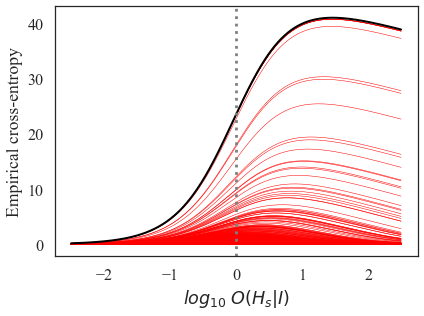

In [40]:
set_style(font='seaborn-poster')

f, ax = plot_indiv_ece(
    lr,
    'lr_alpha_step', 
    rng=[-2.5, 2.5]
)

# highlight the pair discussed in the text
log_odds = np.arange(-2.5, 2.5, 0.01)
odds = np.power(10, log_odds)
lr_val = np.exp(np.float128(lr.lr_alpha_step.loc[(lr.a == 3145) & (lr.b == 3145)])[0])
ece_i = lambda x: ((odds/(1+odds))) * log2(1 + 1/(x*odds))
ax.plot(
    log_odds, 
    ece_i(lr_val),
    color='black',
    linewidth=2
)

plt.axvline(0, color='Grey', linestyle='dotted')
set_size(f, w=6, h=4.5)

plt.savefig(os.path.join(plot_directory, "ece_indiv_same_lr_step.eps"), dpi=500)

plt.show()

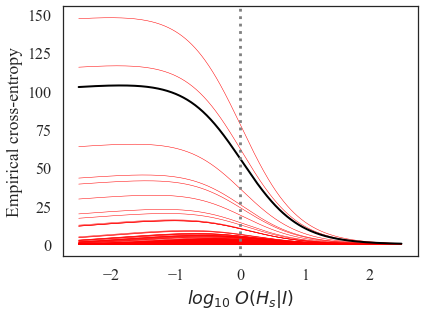

In [41]:
f, ax = plot_indiv_ece(
    lr,
    'lr_alpha_step', 
    rng=[-2.5, 2.5],
    same_src=False
)

# highlight the pair discussed in the text
log_odds = np.arange(-2.5, 2.5, 0.01)
odds = np.power(10, log_odds)
lr_val = np.exp(np.float128(lr.lr_alpha_step.loc[(lr.a == 4518) & (lr.b == 2133)])[0])
ece_i = lambda x: ( (1/(1+odds))  ) * log2(1 + x*odds)
ax.plot(
    log_odds, 
    ece_i(lr_val),
    color='black',
    linewidth=2
)

plt.axvline(0, color='Grey', linestyle='dotted')
set_size(f, w=6, h=4.5)

plt.savefig(os.path.join(plot_directory, "ece_indiv_diff_lr_step.eps"), dpi=500)

plt.show()